In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('forestfires.csv')
print(data.shape)
print(data.head())

(517, 13)
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [3]:
X = data['FFMC'].values
Y = data['area'].values

In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [5]:
A = np.vstack([X,np.ones(len(X))]).T
Y = Y[:, np.newaxis]

In [6]:
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),Y)
print(alpha)

[[  0.46267169]
 [-29.09143557]]


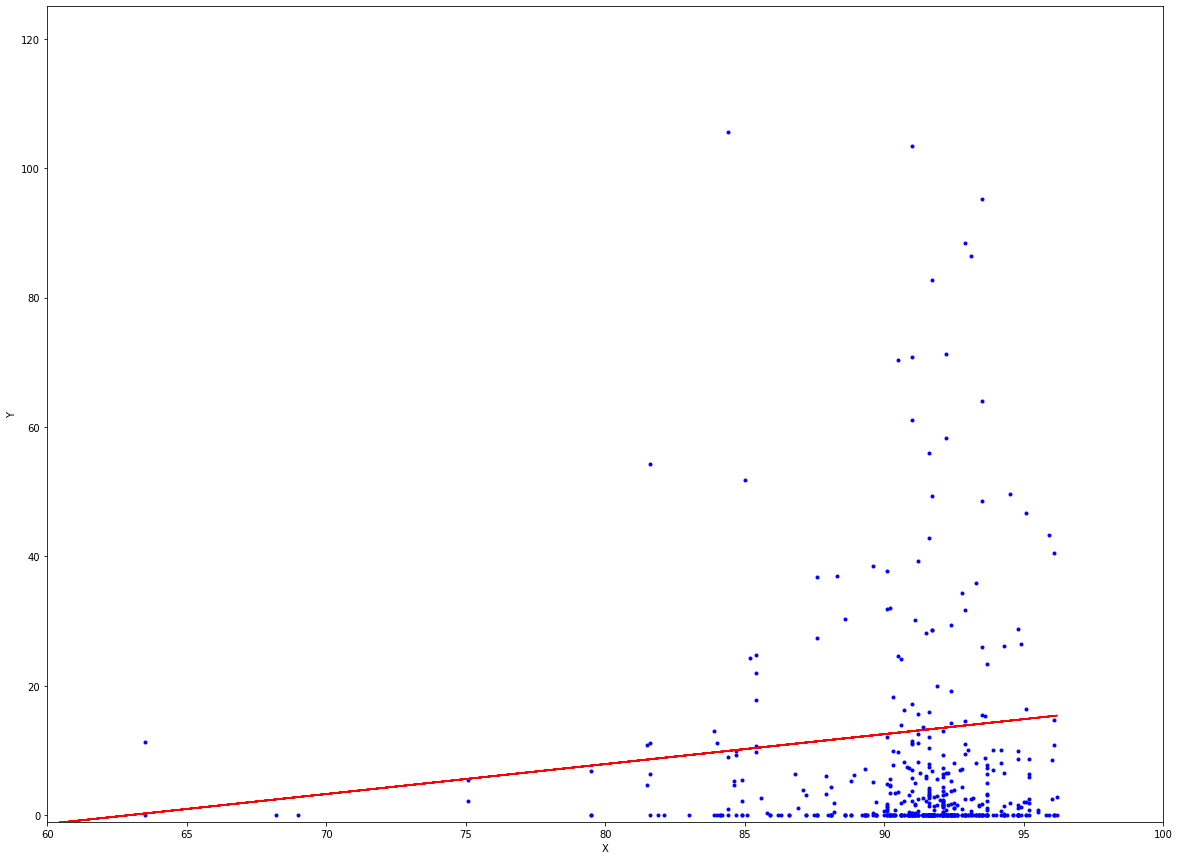

In [7]:
plt.figure(figsize = (20,15))
plt.plot(X, Y, 'b.')
plt.plot(X, alpha[0]*X + alpha[1], 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(60 , 100)
plt.ylim(-1 , 125)
plt.show()

In [8]:
#using inbuilt method 
from sklearn.linear_model import LinearRegression
X = np.c_[data['FFMC']]
Y = np.c_[data['area']]
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
lin_reg.intercept_,lin_reg.coef_

(array([-29.09143557]), array([[0.46267169]]))

In [9]:
X_new = np.array([18.75,96.119])
B = np.vstack([X_new,np.ones(len(X_new))]).T
Y_predicted = B.dot(alpha)
print(Y_predicted)

[[-20.41634139]
 [ 15.38010456]]


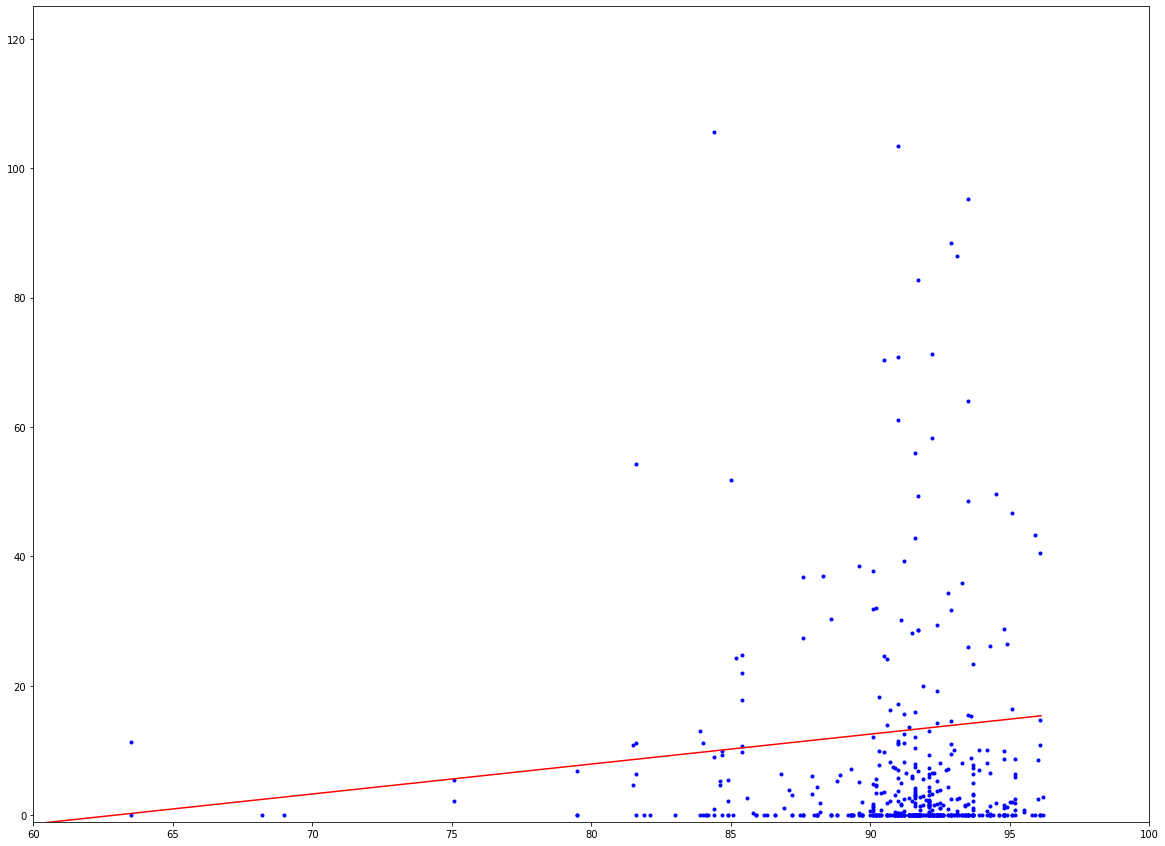

In [10]:
plt.figure(figsize = (20,15))
plt.plot(X,Y,"b.")
plt.plot(X_new,Y_predicted,"r-")
plt.xlim(60 , 100)
plt.ylim(-1 , 125)
plt.show()